In [1]:
# Compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

# The raw image is available in spicy.misc package with the name face.

# Hint:
#     import numpy as np
#     from sklearn import cluster, datasets
#     from scipy import misc

# Load Libraries

In [2]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt

# Load Image(Data)

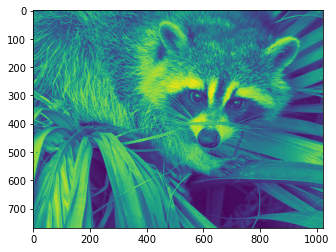

In [3]:
image = misc.face(gray = True)
plt.imshow(image)

# Basic Information about the Image(Data)

In [4]:
image.shape

(768, 1024)

# Preprocess the Image into an Array

In [5]:
image_r = (image / 255.0).reshape(-1,3)

In [6]:
image_r.shape

(262144, 3)

# Use K-Means for 5 Clusters from Reshaped Image Array

In [7]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5).fit(image_r)
y_pred_kmeans=k_means.predict(image_r)

In [8]:
k_means.cluster_centers_.shape

(5, 3)

In [9]:
k_means.labels_.shape

(262144,)

# Create New Image Array from the Generated Clusters and Labels  

In [10]:
newimg = k_means.cluster_centers_[k_means.labels_]

In [11]:
newimg.shape

(262144, 3)

# Reshape the New Image Array with Original Image Dimensions 

In [12]:
newimg=np.reshape(newimg, (image.shape))

In [13]:
newimg.shape

(768, 1024)

# Plot Original and Color Compressed Image

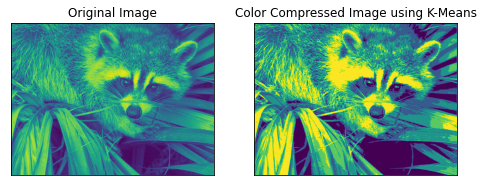

In [14]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,2,1,xticks=[],yticks=[],title='Original Image')
ax.imshow(image)
ax=fig.add_subplot(1,2,2,xticks=[],yticks=[],title='Color Compressed Image using K-Means')
ax.imshow(newimg)
plt.show()